<a href="https://colab.research.google.com/github/castudil/cardiology/blob/main/cardiology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGAR LOS DATOS

Los datos ya se encuentran previamente tabulados en un archivo Excel.

In [5]:
import pandas as pd
df = pd.read_excel (r'cardiology.xlsx')
df.head()

,Urg,Hosp,Or,Pre,recu,Per,Dys,Fai,Ang,Lvef,Rev,High,Con,Ede,Hea,pf
0,0,0,0,0,0,0,0,1,2,0,1,1,0,1,0,0.44971
1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0.64100
2,0,0,0,1,0,1,1,1,1,1,1,1,0,0,1,0.87922
3,0,0,0,0,0,1,1,1,2,0,0,1,1,0,1,0.60164
4,0,0,0,1,0,1,1,0,2,0,0,1,0,1,1,0.67164


#Preparación de los datos

Los datos  corresponden a una naturaleza binaria, a excepción de tres columnas que se modificarán en los siguientes bloques de códigos. Además incluye una categoría especial que se llama pf y corresponde a un Score. Éste puntaje ha sido calculado a través de una función especialmente diseñada para establecer la gravedad de un paciente. pf será extraída del conjunto de datos originales y usadas finalmente para con testar los resultados arrojados por los métodos de aprendizaje no supervisados.

Todas las columnas son de naturaleza numérica, por los que pueden ser tratados como datos vectoriales sin problemasTodas las columnas son de naturaleza numérica, por los que pueden ser tratados como datos vectoriales.

In [6]:
score=df["pf"] ## apartar la variable de scoring de gravedad del paciente
score.head()
score.shape

(5794,)

In [8]:
del df["pf"] ## eliminar el scoring del coinjunto de datos
df.head()

,Urg,Hosp,Or,Pre,recu,Per,Dys,Fai,Ang,Lvef,Rev,High,Con,Ede,Hea
0,0,0,0,0,0,0,0,1,2,0,1,1,0,1,0
1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1
2,0,0,0,1,0,1,1,1,1,1,1,1,0,0,1
3,0,0,0,0,0,1,1,1,2,0,0,1,1,0,1
4,0,0,0,1,0,1,1,0,2,0,0,1,0,1,1


#NORMALIZACION

El siguiente paso consiste en normalizar algunas columnas que tienen opciones más allá de cero a uno. existen tres columnas con estas condiciones Ang,recu y Dys. Estas columnas fueron identificadas a través de una inspección manual del conjunto de datos.

Por una parte la transformación eliminará el concepto de la magnitud absoluta de dichas categorías, lo que afecta la interpretabilidad. Sin embargo, el no realizar la normalización significará que esas columnas tendrán un impacto mayor en los cálculos de distancias internos de los mecanismos de aprendizaje automático, lo que puede llevar a conclusiones erróneas. En otras palabras se trata de un paso necesario para poder procesar los datos con los algoritmosEn otras palabras se trata de un paso necesario para poder procesar los datos con los algoritmos.

In [9]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)
#print(df. columns)
x = pd.DataFrame(x, columns=df.columns)
x.describe()

,Urg,Hosp,Or,Pre,recu,Per,Dys,Fai,Ang,Lvef,Rev,High,Con,Ede,Hea
count,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03,5.794000e+03
mean,-1.233411e-14,-8.073241e-15,8.902699e-15,-3.722696e-15,4.037713e-15,-2.701019e-16,5.494397e-16,4.426329e-16,-1.835911e-15,1.366624e-15,-1.101025e-15,2.198755e-15,-4.410234e-16,9.197567e-18,8.559486e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-4.089057e-01,-3.079938e-01,-1.805949e-01,-7.681217e-01,-2.960455e-01,-9.219198e-01,-1.278406e+00,-7.962121e-01,-1.116095e+00,-7.718184e-01,-7.144421e-01,-7.689740e-01,-7.520125e-01,-8.940799e-01,-6.433198e-01
25%,-4.089057e-01,-3.079938e-01,-1.805949e-01,-7.681217e-01,-2.960455e-01,-9.219198e-01,-1.278406e+00,-7.962121e-01,-1.116095e+00,-7.718184e-01,-7.144421e-01,-7.689740e-01,-7.520125e-01,-8.940799e-01,-6.433198e-01
50%,-4.089057e-01,-3.079938e-01,-1.805949e-01,-7.681217e-01,-2.960455e-01,-9.219198e-01,7.522782e-02,-7.962121e-01,1.787898e-01,-7.718184e-01,-7.144421e-01,-7.689740e-01,-7.520125e-01,-8.940799e-01,-6.433198e-01
75%,-4.089057e-01,-3.079938e-01,-1.805949e-01,1.301877e+00,-2.960455e-01,1.084693e+00,7.522782e-02,1.255947e+00,1.787898e-01,1.295642e+00,1.399694e+00,1.300434e+00,1.329765e+00,1.118468e+00,1.554437e+00
max,2.445552e+00,3.246819e+00,5.537256e+00,1.301877e+00,9.009311e+00,1.084693e+00,1.428861e+00,1.255947e+00,1.473675e+00,1.295642e+00,1.399694e+00,1.300434e+00,1.329765e+00,1.118468e+00,1.554437e+00


VERIFICACION DE LA NORMALIZACION

Una rápida verificación del procesamiento de los datos es ver un resumen estadístico de ellos. A partir de esta información se puede observar que los mínimos y máximos en todos los casos es de cero a uno.

Desde aquí en adelante se asume que los datos están listos para ser procesados por los mecanismos no supervisados.

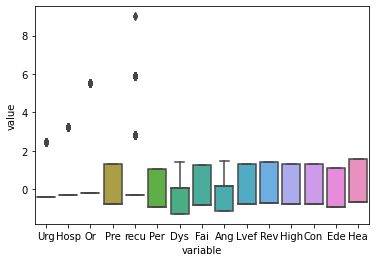

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="variable", y="value", data=pd.melt(x))

plt.show()

#Observaciones

A partir del análisis del resumen estadístico y de los gráficos de caja, llama la atención que las columnas URG, Hosp, Or y recu tienen una media muy baja, cercana a cero y con una desviación estándar baja. Esto hace pensar que la mayoría de los datos en estos casos es cero.

RECOMENDACION: analizar la posibilidad de eliminar estas categorías.

Para efectos de este analisis, se utilizarán todas las variables, eso si considerando la normalización de las tres características indicadas más arriba.

#Principal Component Analysis

PCA es una técnica para reducir el número de dimensiones en un conjunto de datos conservando la mayor parte de la información contenida originalmente. Utiliza la correlación entre algunas dimensiones y trata de proporcionar un número mínimo de variables que mantenga la cantidad máxima de variación o información sobre cómo se distribuyen los datos originales. Hace uso de valores propios y vectores propios. Estos vectores se extraen desde la matriz de covarianza y tienen la propiedad de que apuntan a lo largo de las direcciones principales de variación de los datos.

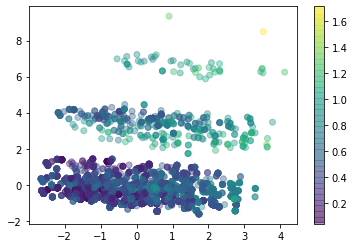

In [20]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
Xt = pca.fit_transform(x)
f, ax = plt.subplots()
points = ax.scatter(Xt[:,0], Xt[:,1], c=score, alpha= 0.4, cmap="viridis")
f.colorbar(points)
plt.show()

#Visualización t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) es una técnica para la reducción de la dimensionalidad y es particularmente adecuada para la visualización de conjuntos de datos de alta dimensión. A diferencia de PCA, no es una técnica matemática sino probabilística. [el paper original](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) describe el funcionamiento de t-SNE como:


“t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.

“Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements become too large)”.

In [13]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5794 samples in 0.015s...
[t-SNE] Computed neighbors for 5794 samples in 1.805s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5794
[t-SNE] Computed conditional probabilities for sample 2000 / 5794
[t-SNE] Computed conditional probabilities for sample 3000 / 5794
[t-SNE] Computed conditional probabilities for sample 4000 / 5794
[t-SNE] Computed conditional probabilities for sample 5000 / 5794
[t-SNE] Computed conditional probabilities for sample 5794 / 5794
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.846165
[t-SNE] KL divergence after 300 iterations: 1.373272


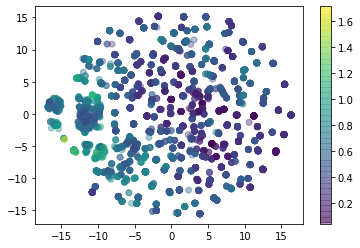

In [19]:
# tsne_results[:,0]
# tsne_results[:,1]
f, ax = plt.subplots()
points = ax.scatter(tsne_results[:,0], tsne_results[:,1], c=score, alpha= 0.4, cmap="viridis")
f.colorbar(points)
plt.show()

#Observaciones
Al observar la gráfica, es posible ver que los puntos de color violeta, que están asociados a Scores bajos, tienden a estar ubicados en el centro de la imagen. Por otra parte aquellos scores de rango medio y altos, presentado por colores verdes amarillos, están ubicados preferentemente hacia el tercer cuadrante. Estos patrones que son reconocibles de manera visual, entregan una idea intuitiva de que es factible aprender a diferenciar aquellos discos altos de los bajos a partir exclusivamente de las características.

Es posible extraer una intuicion general a partir de las proyecciones PCA.